In [1]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from emoji import EMOJI_DATA
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
def startsWithDateAndTimeAndroid(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' #pattern for date and time
    result = re.match(pattern, s) 
    if result:
        return True
    return False



In [3]:
def FindAuthor(s):
    s=s.split(":") #After author name, a message starts. So, to get an author, we have to split the message by:
    if len(s)==2:
        return True
    else:
        return False

In [4]:
def getDataPointAndroid(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [5]:
def getDataPointios(line):
    splitLine = line.split('] ')
    dateTime = splitLine[0]
    if ',' in dateTime:
        date, time = dateTime.split(',')
    else:
        date, time = dateTime.split(' ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(':')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    if time[5]==":":
        time = time[:5]+time[-3:]
    else:
        if 'AM' in time or 'PM' in time:
            time = time[:6]+time[-3:]
        else:
            time = time[:6]
    return date, time, author, message

In [6]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)

    return emoji_list

In [7]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'C:\\Users\\USER\\Documents\\MY PROJECTS\\DATALEUM\\Data\\GTTP.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    device=''
    first=fp.readline()
    print(first)
    if '[' in first:
      device='ios'
    else:
      device="android"
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None #message contains 4 things-"date","time","author","message" 
    while True:
        line = fp.readline() 
        if not line: 
            break
        if device=="ios":
          line = line.strip()
          if startsWithDateAndTimeios(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointios(line)
            messageBuffer.append(message)
          else:
            line= (line.encode('ascii', 'ignore')).decode("utf-8")
            if startsWithDateAndTimeios(line):
              if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
              date, time, author, message = getDataPointios(line)
              messageBuffer.append(message)
            else:
              messageBuffer.append(line)
        else:
          line = line.strip()
          if startsWithDateAndTimeAndroid(line): 
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointAndroid(line)
            messageBuffer.append(message)
          else:
            messageBuffer.append(line)

13/09/2022, 14:47 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.



In [8]:
if device =='android':
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.dropna()
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
        df = df.dropna()
        df["Date"] = df["Date"].apply(dateconv)
        df["Date"] = pd.to_datetime(df["Date"],format='%Y-%m-%d')
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [9]:
df.head(2) #return first two rows of dataframe


,Date,Time,Author,Message,emoji,urlcount
4,2022-09-13,14:47,+234 816 555 0428,Good Afternoon Group,[],0
17,2022-09-13,15:04,+234 813 811 5975,Good afternoon,[],0


In [10]:
df.info() #statistics of the group chat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2695 entries, 4 to 2828
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2695 non-null   datetime64[ns]
 1   Time      2695 non-null   object        
 2   Author    2695 non-null   object        
 3   Message   2695 non-null   object        
 4   emoji     2695 non-null   object        
 5   urlcount  2695 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 147.4+ KB


In [11]:
df.Author.unique() #returns all unique athors means all members of group

array(['+234 816 555 0428', '+234 813 811 5975', '+234 806 691 9561',
       '+234 816 458 3514', '+234 701 603 0958', '+234 803 970 8243',
       '+234 816 656 5441', '+234 703 023 7698', '+234 803 388 9558',
       '+234 706 932 9298', '+234 803 239 7679', '+234 706 055 3660',
       '+234 803 466 6408', '+234 803 515 4843', '+234 813 741 9269',
       '+234 814 166 4393', '+234 808 662 6950', '+234 703 043 1697',
       '+234 810 975 0409', '+234 706 248 9122', 'Cynthia Dataleum',
       'Bode Dataleum', '+234 701 062 0091', '+234 809 650 6571',
       '+234 817 595 7252', 'Tochi Dataleum', 'Lestyn🦅',
       '+234 701 992 1069', 'Esther Adewumi Dataleum',
       '+234 811 352 8665', '+234 815 337 9058', 'Adebimpe Dataleum GTT',
       'Ugo Henry', '+234 805 415 9202', '+234 708 733 7956',
       '+234 816 896 7844', '+234 812 598 8360', '+234 701 363 4674',
       '+234 815 799 9531', 'Racheal dataleum', '+234 803 810 7436',
       'Boluwatife Dataleum', '+234 817 993 9944', '+234 8

In [12]:
df = df.dropna() #drops all null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2695 entries, 4 to 2828
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2695 non-null   datetime64[ns]
 1   Time      2695 non-null   object        
 2   Author    2695 non-null   object        
 3   Message   2695 non-null   object        
 4   emoji     2695 non-null   object        
 5   urlcount  2695 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 147.4+ KB


In [13]:
total_messages = df.shape[0]
print(total_messages)

2695


In [14]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

0


In [15]:
emojis = sum(df['emoji'].str.len()) 
print(emojis)

783


In [16]:
URLPATTERN = r'(https?://\S+)' #regex pattern matching with start with https
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len() #return url which matches with pattern and count it through lambda function
links = np.sum(df.urlcount) #sumup all the links
print(links)

59


## Let us separate media messages and text messages

In [32]:
link_messages= df[df['urlcount']>0]
deleted_messages=df[(df["Message"] == " You deleted this message")| (df["Message"] == " This message was deleted.")]
media_messages_df = df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
#messages_df = messages_df.drop(link_messages.index)

In [33]:
messages_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2461 entries, 4 to 2828
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2461 non-null   datetime64[ns]
 1   Time      2461 non-null   object        
 2   Author    2461 non-null   object        
 3   Message   2461 non-null   object        
 4   emoji     2461 non-null   object        
 5   urlcount  2461 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 134.6+ KB


## Now let's calculate words and letters 

In [34]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' '))) #word is calculated by spliting sentence by whitespace
messages_df["MessageCount"]=1

In [35]:
messages_df.head(30)


,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
4,2022-09-13,14:47,+234 816 555 0428,Good Afternoon Group,[],0,21,4,1
17,2022-09-13,15:04,+234 813 811 5975,Good afternoon,[],0,15,3,1
19,2022-09-13,15:05,+234 806 691 9561,Greetings,[],0,10,2,1
20,2022-09-13,15:07,+234 816 458 3514,Good afternoon,[],0,15,3,1
22,2022-09-13,15:13,+234 701 603 0958,"Hello everyone, good afternoon. Trust the we...",[],0,966,172,1
31,2022-09-15,03:08,+234 803 970 8243,I Didn’t get any mail,[],0,22,6,1
32,2022-09-15,06:44,+234 816 656 5441,What email please,[],0,18,4,1
33,2022-09-15,09:54,+234 703 023 7698,Good morning admin Pls what is d last day for...,[],0,54,12,1
34,2022-09-15,09:58,+234 803 388 9558,I thought they said yesterday? Although the m...,[],0,69,12,1
35,2022-09-15,09:59,+234 803 388 9558,SO I beleive they should still be able to giv...,[],0,66,15,1


In [36]:
messages_df["emojicount"]= df['emoji'].str.len()
messages_df["emojicount"]

4       0
17      0
19      0
20      0
22      0
       ..
2822    4
2824    1
2825    0
2827    0
2828    0
Name: emojicount, Length: 2461, dtype: int64

## Author wise

In [37]:
frnds = messages_df.Author.unique()

for i in range(len(frnds)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == frnds[i]]
  # req_df will contain messages of only one particular user
  print(f'Statistics of {frnds[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent:', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message:', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == frnds[i]].shape[0]
  print('Media Messages Sent:', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent:', emojis)
  #links consist of total links
  links = sum(link_messages[link_messages['Author'] == frnds[i]]["urlcount"]) 
  messages_df["Links Sent"] = links
  print('Links Sent:', links)   
  print()

Statistics of +234 816 555 0428 -
Messages Sent: 1
Words per message: 4.0
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +234 813 811 5975 -
Messages Sent: 241
Words per message: 7.373443983402489
Media Messages Sent: 8
Emojis Sent: 46
Links Sent: 0

Statistics of +234 806 691 9561 -
Messages Sent: 25
Words per message: 5.8
Media Messages Sent: 0
Emojis Sent: 5
Links Sent: 0

Statistics of +234 816 458 3514 -
Messages Sent: 54
Words per message: 5.888888888888889
Media Messages Sent: 2
Emojis Sent: 11
Links Sent: 0

Statistics of +234 701 603 0958 -
Messages Sent: 91
Words per message: 25.65934065934066
Media Messages Sent: 4
Emojis Sent: 15
Links Sent: 6

Statistics of +234 803 970 8243 -
Messages Sent: 8
Words per message: 4.875
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0

Statistics of +234 816 656 5441 -
Messages Sent: 72
Words per message: 5.513888888888889
Media Messages Sent: 1
Emojis Sent: 38
Links Sent: 0

Statistics of +234 703 023 7698 -
Messages 

# unique emojis

In [38]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

126


# Most used emoji

In [39]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('▪️', 68), ('😂', 56), ('🙏', 44), ('😊', 39), ('👍', 28), ('❗', 21), ('🥰', 20), ('😭', 18), ('🙌🏽', 17), ('❤️', 17), ('🤣', 17), ('😒', 17), ('😮', 16), ('🙀', 15), ('😁', 14), ('🙇🏻\u200d♀️', 14), ('👆🏿', 13), ('🤭', 13), ('♥️', 12), ('🤗', 12), ('😀', 11), ('😏', 10), ('🙏🏽', 10), ('🥺', 9), ('🥳', 9), ('✨', 9), ('✅', 8), ('🏃\u200d♀️', 8), ('😳', 7), ('😩', 7), ('🥂', 7), ('🔥', 6), ('🙄', 6), ('👏', 6), ('😇', 6), ('☕', 5), ('☹️', 5), ('☕️', 5), ('💪', 5), ('🎉', 5), ('🎂', 5), ('😫', 5), ('🫂', 5), ('👆', 4), ('🌚', 4), ('😢', 4), ('🙌', 4), ('⤵️', 4), ('😅', 4), ('🙌🏻', 4), ('👏🏼', 4), ('💪🏾', 4), ('🙈', 4), ('☝️', 3), ('👍🏾', 3), ('🙏🏾', 3), ('\U0001fae1', 3), ('🤔', 3), ('▪', 3), ('😃', 3), ('😉', 3), ('🤦\u200d♀️', 3), ('🎊', 3), ('👑', 3), ('🏃\u200d♂️', 3), ('🎈', 3), ('🦅', 3), ('😆', 2), ('😱', 2), ('👆🏼', 2), ('👍🏽', 2), ('\U0001f979', 2), ('🤩', 2), ('🤪', 2), ('😋', 2), ('🙆\u200d♀️', 2), ('😎', 2), ('🙇🏿\u200d♂️', 2), ('🙌🏿', 2), ('☝🏼', 1), ('✋', 1), ('☝🏽', 1), ('👍🏻', 1), ('😕', 1), ('✋🏻', 1), ('✌🏻', 1), ('🤷\u200d♂️', 1), ('☑️', 

In [40]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,▪️,68
1,😂,56
2,🙏,44
3,😊,39
4,👍,28
...,...,...
121,💋,1
122,📶,1
123,👀,1
124,🙅‍♂️,1


In [41]:
emoji_df.to_csv("GttpEmojis.csv")

In [42]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Text(0, 0.5, 'Time')

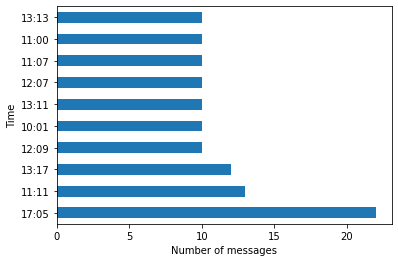

In [43]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [44]:
messages_df.to_excel("GTTPWhatsapp2.xlsx", index=False)
